In [1]:
import numpy as np
import pandas as pd
import cesium
from cesium import datasets, featurize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn
seaborn.set()

In [2]:
eeg_data= datasets.fetch_andrzejak()

Loaded data from cached archive.


In [3]:
# The EEG dataset is downloaded as a dictionary 
type(eeg_data)

dict

In [4]:
# Let's check the keys
eeg_data.keys()

dict_keys(['times', 'measurements', 'classes', 'archive', 'header'])

In [9]:
np.array(eeg_data['times']).shape

(500, 4097)

In [6]:
np.array(eeg_data['classes']).shape

(500,)

In [7]:
np.array(eeg_data['measurements']).shape

(500, 4097)

In [8]:
df = pd.DataFrame(eeg_data, columns=['times', 'measurements', 'classes'])
df.head()

,times,measurements,classes
0,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[40.0, 48.0, 35.0, 5.0, -40.0, -54.0, -32.0, 6...",Z
1,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...",Z
2,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-37.0, -22.0, -17.0, -24.0, -31.0, -20.0, -5....",Z
3,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-31.0, -43.0, -39.0, -39.0, -9.0, -5.0, 18.0,...",Z
4,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[14.0, 26.0, 32.0, 25.0, 16.0, 8.0, 8.0, 12.0,...",Z


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   times         500 non-null    object
 1   measurements  500 non-null    object
 2   classes       500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [11]:
df.classes.unique()

array(['Z', 'O', 'N', 'F', 'S'], dtype=object)

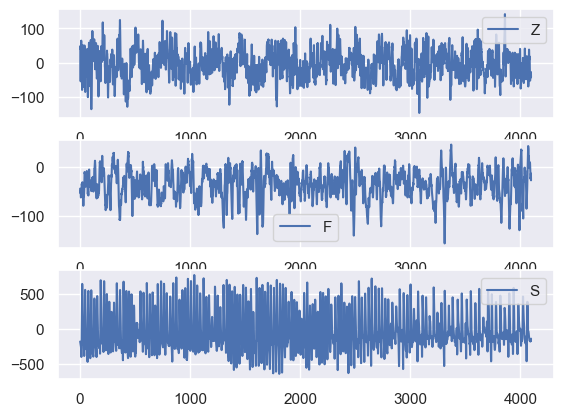

In [12]:
plt.subplot(3, 1, 1)
plt.plot(eeg_data['measurements'][0])
plt.legend(eeg_data['classes'][0])

plt.subplot(3, 1, 2)
plt.plot(eeg_data['measurements'][300])
plt.legend(eeg_data['classes'][300])

plt.subplot(3, 1, 3)
plt.plot(eeg_data['measurements'][450])
plt.legend(eeg_data['classes'][450])

plt.show()

In [13]:
features_to_use = [
    "amplitude",
    "percent_beyond_1_std",
    "max_slope",
    "percent_close_to_median",
    "skew"]

In [14]:
featured_data = featurize.featurize_time_series(times = eeg_data['times'],
                                              values = eeg_data['measurements'],
                                              errors = None,
                                              features_to_use = features_to_use,
                                              scheduler = None)


In [15]:
featured_data.head()

feature,amplitude,percent_beyond_1_std,max_slope,percent_close_to_median,skew
channel,0,0,0,0,0
0,143.5,0.327313,11107.796610,0.505004,0.032805
1,211.5,0.290212,20653.559322,0.640469,-0.092715
2,165.0,0.302660,13537.627119,0.515987,-0.004100
3,171.5,0.300952,17008.813559,0.541128,0.063678
4,170.0,0.305101,13016.949153,0.566268,0.142753


In [16]:
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (amplitude, 0)                500 non-null    float64
 1   (percent_beyond_1_std, 0)     500 non-null    float64
 2   (max_slope, 0)                500 non-null    float64
 3   (percent_close_to_median, 0)  500 non-null    float64
 4   (skew, 0)                     500 non-null    float64
dtypes: float64(5)
memory usage: 23.4 KB


In [17]:
X_train, X_test, y_train, y_test = train_test_split(featured_data.to_numpy(), eeg_data['classes'], random_state=21)

In [18]:
X_train.shape

(375, 5)

In [19]:
X_test.shape

(125, 5)

In [20]:
y_test

array(['O', 'S', 'N', 'F', 'S', 'S', 'Z', 'S', 'O', 'Z', 'F', 'O', 'S',
       'F', 'Z', 'N', 'Z', 'O', 'Z', 'Z', 'S', 'F', 'O', 'N', 'F', 'F',
       'Z', 'N', 'Z', 'N', 'S', 'Z', 'O', 'O', 'S', 'S', 'N', 'S', 'N',
       'S', 'N', 'O', 'N', 'S', 'Z', 'N', 'O', 'Z', 'Z', 'S', 'O', 'Z',
       'F', 'F', 'S', 'Z', 'N', 'O', 'N', 'F', 'Z', 'Z', 'N', 'Z', 'F',
       'Z', 'N', 'F', 'O', 'N', 'N', 'Z', 'N', 'O', 'N', 'F', 'O', 'F',
       'F', 'Z', 'S', 'N', 'Z', 'N', 'O', 'N', 'S', 'N', 'S', 'O', 'O',
       'S', 'O', 'N', 'N', 'S', 'N', 'S', 'Z', 'Z', 'S', 'S', 'O', 'F',
       'S', 'F', 'F', 'Z', 'F', 'Z', 'O', 'O', 'S', 'Z', 'Z', 'F', 'N',
       'Z', 'Z', 'F', 'S', 'N', 'Z', 'N', 'N'], dtype='<U1')

In [21]:
# Let's first build Random Forrest Classifier

rf_cls = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=21)
rf_cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=21)

In [22]:
rf_cls.score(X_test, y_test)

0.56

In [23]:
features_to_use = [
    "amplitude",
    "percent_beyond_1_std",
    "maximum",
    "max_slope",
    "median",
    "median_absolute_deviation",
    "percent_close_to_median",
    "minimum",
    "skew",
    "std",
    "weighted_average",
]

In [24]:
featured_data_extended = featurize.featurize_time_series(times = eeg_data['times'],
                                              values = eeg_data['measurements'],
                                              errors = None,
                                              features_to_use = features_to_use,
                                              scheduler = None)


In [25]:
featured_data_extended.head()

feature,amplitude,percent_beyond_1_std,maximum,max_slope,median,median_absolute_deviation,percent_close_to_median,minimum,skew,std,weighted_average
channel,0,0,0,0,0,0,0,0,0,0,0
0,143.5,0.327313,141.0,11107.796610,-4.0,28.0,0.505004,-146.0,0.032805,40.411000,-4.132048
1,211.5,0.290212,169.0,20653.559322,-51.0,32.0,0.640469,-254.0,-0.092715,48.812668,-52.444716
2,165.0,0.302660,184.0,13537.627119,13.0,31.0,0.515987,-146.0,-0.004100,47.144789,12.705150
3,171.5,0.300952,162.0,17008.813559,-4.0,31.0,0.541128,-181.0,0.063678,47.072316,-3.992433
4,170.0,0.305101,152.0,13016.949153,-18.0,29.0,0.566268,-188.0,0.142753,44.910958,-17.999268


In [26]:
X_train, X_test, y_train, y_test = train_test_split(featured_data_extended.to_numpy(), eeg_data['classes'], random_state=21)

In [27]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=21)

In [28]:
rf_clf.score(X_test, y_test)

0.632

In [29]:
xgb_clf = XGBClassifier(n_estimators = 10, max_depth = 3, random_state=21)

In [30]:
y_train[y_train=='F'] = 0
y_train[y_train=='N'] = 1
y_train[y_train=='O'] = 2
y_train[y_train=='S'] = 3
y_train[y_train=='Z'] = 4

In [31]:
y_train

array(['3', '1', '2', '0', '0', '4', '1', '4', '2', '2', '2', '2', '1',
       '0', '1', '2', '3', '0', '4', '3', '2', '3', '0', '2', '1', '4',
       '2', '3', '1', '4', '2', '1', '0', '0', '3', '4', '0', '2', '4',
       '2', '3', '4', '2', '4', '1', '3', '4', '2', '1', '0', '2', '4',
       '2', '3', '2', '2', '2', '2', '3', '0', '2', '3', '0', '0', '3',
       '4', '1', '4', '0', '3', '0', '3', '3', '3', '4', '4', '2', '0',
       '3', '4', '2', '4', '2', '4', '1', '0', '4', '4', '4', '0', '0',
       '4', '0', '0', '2', '2', '2', '2', '1', '2', '3', '0', '4', '1',
       '0', '2', '2', '0', '1', '2', '0', '1', '0', '0', '3', '3', '3',
       '1', '0', '3', '2', '3', '2', '0', '0', '0', '0', '2', '3', '3',
       '3', '3', '0', '4', '1', '2', '2', '4', '4', '4', '4', '2', '1',
       '4', '4', '4', '1', '1', '0', '4', '2', '2', '4', '3', '2', '1',
       '2', '4', '4', '0', '4', '1', '4', '0', '4', '4', '1', '1', '3',
       '0', '3', '2', '0', '0', '2', '2', '3', '1', '0', '2', '0

In [32]:
y_train = y_train.astype(int)

In [33]:
y_train

array([3, 1, 2, 0, 0, 4, 1, 4, 2, 2, 2, 2, 1, 0, 1, 2, 3, 0, 4, 3, 2, 3,
       0, 2, 1, 4, 2, 3, 1, 4, 2, 1, 0, 0, 3, 4, 0, 2, 4, 2, 3, 4, 2, 4,
       1, 3, 4, 2, 1, 0, 2, 4, 2, 3, 2, 2, 2, 2, 3, 0, 2, 3, 0, 0, 3, 4,
       1, 4, 0, 3, 0, 3, 3, 3, 4, 4, 2, 0, 3, 4, 2, 4, 2, 4, 1, 0, 4, 4,
       4, 0, 0, 4, 0, 0, 2, 2, 2, 2, 1, 2, 3, 0, 4, 1, 0, 2, 2, 0, 1, 2,
       0, 1, 0, 0, 3, 3, 3, 1, 0, 3, 2, 3, 2, 0, 0, 0, 0, 2, 3, 3, 3, 3,
       0, 4, 1, 2, 2, 4, 4, 4, 4, 2, 1, 4, 4, 4, 1, 1, 0, 4, 2, 2, 4, 3,
       2, 1, 2, 4, 4, 0, 4, 1, 4, 0, 4, 4, 1, 1, 3, 0, 3, 2, 0, 0, 2, 2,
       3, 1, 0, 2, 0, 3, 3, 3, 2, 2, 3, 1, 2, 1, 3, 3, 4, 1, 1, 3, 3, 1,
       2, 3, 0, 0, 3, 1, 1, 3, 3, 3, 4, 0, 0, 0, 2, 3, 4, 4, 4, 0, 3, 4,
       0, 4, 3, 3, 1, 2, 3, 3, 1, 1, 2, 0, 4, 4, 4, 3, 1, 4, 2, 3, 2, 3,
       0, 1, 0, 1, 3, 4, 0, 3, 4, 0, 4, 0, 0, 1, 0, 0, 2, 1, 4, 3, 2, 4,
       0, 0, 4, 1, 2, 0, 0, 3, 3, 2, 2, 0, 1, 1, 1, 4, 2, 4, 0, 1, 1, 2,
       4, 2, 2, 1, 1, 2, 4, 4, 4, 4, 2, 0, 2, 3, 3,

In [34]:
y_test[y_test=='F'] = 0
y_test[y_test=='N'] = 1
y_test[y_test=='O'] = 2
y_test[y_test=='S'] = 3
y_test[y_test=='Z'] = 4

In [35]:
y_test

array(['2', '3', '1', '0', '3', '3', '4', '3', '2', '4', '0', '2', '3',
       '0', '4', '1', '4', '2', '4', '4', '3', '0', '2', '1', '0', '0',
       '4', '1', '4', '1', '3', '4', '2', '2', '3', '3', '1', '3', '1',
       '3', '1', '2', '1', '3', '4', '1', '2', '4', '4', '3', '2', '4',
       '0', '0', '3', '4', '1', '2', '1', '0', '4', '4', '1', '4', '0',
       '4', '1', '0', '2', '1', '1', '4', '1', '2', '1', '0', '2', '0',
       '0', '4', '3', '1', '4', '1', '2', '1', '3', '1', '3', '2', '2',
       '3', '2', '1', '1', '3', '1', '3', '4', '4', '3', '3', '2', '0',
       '3', '0', '0', '4', '0', '4', '2', '2', '3', '4', '4', '0', '1',
       '4', '4', '0', '3', '1', '4', '1', '1'], dtype='<U1')

In [36]:
y_test = y_test.astype(int)

In [37]:
y_test

array([2, 3, 1, 0, 3, 3, 4, 3, 2, 4, 0, 2, 3, 0, 4, 1, 4, 2, 4, 4, 3, 0,
       2, 1, 0, 0, 4, 1, 4, 1, 3, 4, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 1, 3,
       4, 1, 2, 4, 4, 3, 2, 4, 0, 0, 3, 4, 1, 2, 1, 0, 4, 4, 1, 4, 0, 4,
       1, 0, 2, 1, 1, 4, 1, 2, 1, 0, 2, 0, 0, 4, 3, 1, 4, 1, 2, 1, 3, 1,
       3, 2, 2, 3, 2, 1, 1, 3, 1, 3, 4, 4, 3, 3, 2, 0, 3, 0, 0, 4, 0, 4,
       2, 2, 3, 4, 4, 0, 1, 4, 4, 0, 3, 1, 4, 1, 1])

In [38]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
accuracy = xgb_clf.score(X_test, y_test)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(featured_data_extended.to_numpy(), eeg_data['classes'], random_state=21)

In [42]:
y_train

array(['S', 'N', 'O', 'F', 'F', 'Z', 'N', 'Z', 'O', 'O', 'O', 'O', 'N',
       'F', 'N', 'O', 'S', 'F', 'Z', 'S', 'O', 'S', 'F', 'O', 'N', 'Z',
       'O', 'S', 'N', 'Z', 'O', 'N', 'F', 'F', 'S', 'Z', 'F', 'O', 'Z',
       'O', 'S', 'Z', 'O', 'Z', 'N', 'S', 'Z', 'O', 'N', 'F', 'O', 'Z',
       'O', 'S', 'O', 'O', 'O', 'O', 'S', 'F', 'O', 'S', 'F', 'F', 'S',
       'Z', 'N', 'Z', 'F', 'S', 'F', 'S', 'S', 'S', 'Z', 'Z', 'O', 'F',
       'S', 'Z', 'O', 'Z', 'O', 'Z', 'N', 'F', 'Z', 'Z', 'Z', 'F', 'F',
       'Z', 'F', 'F', 'O', 'O', 'O', 'O', 'N', 'O', 'S', 'F', 'Z', 'N',
       'F', 'O', 'O', 'F', 'N', 'O', 'F', 'N', 'F', 'F', 'S', 'S', 'S',
       'N', 'F', 'S', 'O', 'S', 'O', 'F', 'F', 'F', 'F', 'O', 'S', 'S',
       'S', 'S', 'F', 'Z', 'N', 'O', 'O', 'Z', 'Z', 'Z', 'Z', 'O', 'N',
       'Z', 'Z', 'Z', 'N', 'N', 'F', 'Z', 'O', 'O', 'Z', 'S', 'O', 'N',
       'O', 'Z', 'Z', 'F', 'Z', 'N', 'Z', 'F', 'Z', 'Z', 'N', 'N', 'S',
       'F', 'S', 'O', 'F', 'F', 'O', 'O', 'S', 'N', 'F', 'O', 'F

In [43]:
y_train[y_train=='Z'] = 0
y_train[y_train=='O'] = 0
y_train[y_train=='F'] = 1
y_train[y_train=='N'] = 1
y_train[y_train=='S'] = 2

In [44]:
y_train = y_train.astype(int)

In [45]:
y_train

array([2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2,
       1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0,
       1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0,
       1, 0, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2,
       1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2,

In [46]:
y_train.shape

(375,)

In [47]:
y_test[y_test=='Z'] = 0
y_test[y_test=='O'] = 0
y_test[y_test=='F'] = 1
y_test[y_test=='N'] = 1
y_test[y_test=='S'] = 2

In [48]:
y_test

array(['0', '2', '1', '1', '2', '2', '0', '2', '0', '0', '1', '0', '2',
       '1', '0', '1', '0', '0', '0', '0', '2', '1', '0', '1', '1', '1',
       '0', '1', '0', '1', '2', '0', '0', '0', '2', '2', '1', '2', '1',
       '2', '1', '0', '1', '2', '0', '1', '0', '0', '0', '2', '0', '0',
       '1', '1', '2', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1',
       '1', '0', '2', '1', '0', '1', '0', '1', '2', '1', '2', '0', '0',
       '2', '0', '1', '1', '2', '1', '2', '0', '0', '2', '2', '0', '1',
       '2', '1', '1', '0', '1', '0', '0', '0', '2', '0', '0', '1', '1',
       '0', '0', '1', '2', '1', '0', '1', '1'], dtype='<U1')

In [49]:
y_test = y_test.astype(int)

In [50]:
y_test

array([0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1])

In [51]:
xgb_clf = XGBClassifier(n_estimators = 10, max_depth = 3, random_state=21)

In [52]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
accuracy = xgb_clf.score(X_test, y_test)
print('accuracy: ', accuracy)

accuracy:  0.872
